## Purpose

The purpose of this script is to visualize elements of our fire data. Sepecifically we will be creating graphs to show:

    1.	A histogram with the number of fires occurring every 50 miles from Pahrump up to 1250 miles
    2.	A time series of total acres burned per year for the fires occurring within 1250 miles from Pahrump
    3.	A time series containing the fire smoke estimate for Pahrump and the AQI estimate

We will being by loading some basic python libraries and necessary files.

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

#Loading files
fire_info = pd.read_csv('../intermediate_data/filtered_fire_info.csv')
smoke_estimate = pd.read_csv('../clean_data//annual_smoke_estimate.csv')
aqi_estimate = pd.read_csv('../clean_data//yearly_avg_aqi.csv')

We will now create a historgram of the number of fires every 50 miles within the 1250 mile boundary from Pahrump, NV occurring between 1963 and 2023 (as previously specified, data actually only goes until 2020).

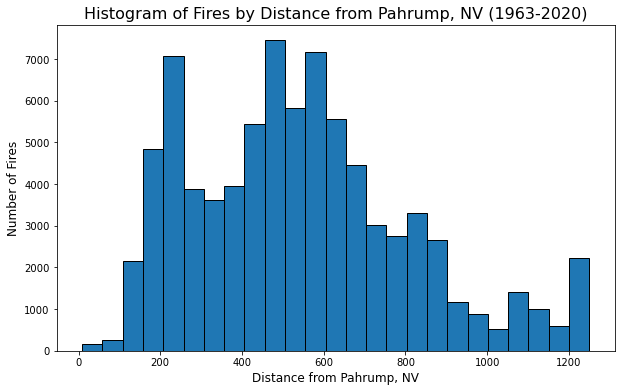

In [3]:
#Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(fire_info['shortest_dist'], bins = int(1250/50), edgecolor = 'black')
plt.title("Histogram of Fires by Distance from Pahrump, NV (1963-2020)", size=16)
plt.xlabel('Distance from Pahrump, NV', size=12)
plt.ylabel('Number of Fires', size=12)
plt.show()

Next we will create a time series graph of the total acres burned per year for the fires occurring within 1250 miles from Pahrump. We will need to aggregate the burned acreage before creating the plot.

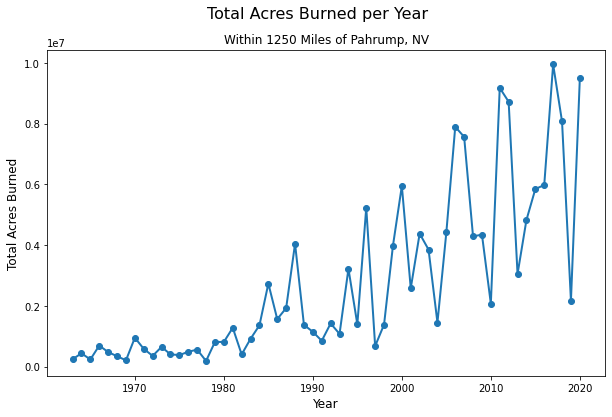

In [4]:
#Creating the total acres burned per year
total_burn = fire_info.groupby('Fire_Year')['GIS_Acres'].sum().to_frame('tot_acres_burned').reset_index()

#Plotting the timeseries
x = total_burn['Fire_Year']
y = total_burn['tot_acres_burned']

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='solid',
     linewidth=2, markersize=6)
plt.suptitle('Total Acres Burned per Year', size = 16)
plt.title("Within 1250 Miles of Pahrump, NV", size=12)
plt.xlabel('Year', size=12)
plt.ylabel('Total Acres Burned', size=12)
plt.show()

Finally, we will create a time series graph with 2 lines, one for the fire smoke estimate and the other for the AQI estimate in Pahrump, NV.

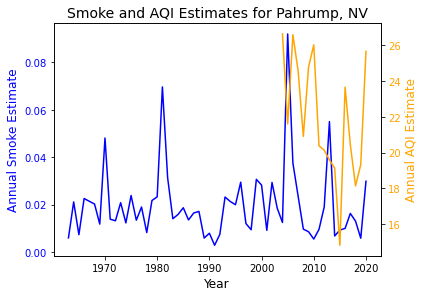

In [12]:
#Joining the data to create blank values for shorter AQI time range
smoke_aqi = pd.merge(left = smoke_estimate, right= aqi_estimate, how = "left", left_on = 'Fire_Year', right_on = 'year')

#Plotting the timeseries
x = smoke_aqi['Fire_Year']
y1 = smoke_aqi['Annual_Smoke_Estimate']
y2 = smoke_aqi['annual_avg_aqi']

fig, ax1 = plt.subplots()
ax1.set_xlabel('Year', size = 12)
ax1.set_ylabel('Annual Smoke Estimate', size = 12, color = 'blue')
ax1.plot(x, y1, color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Annual AQI Estimate', size = 12, color = 'orange')
ax2.plot(x, y2, color = 'orange')
ax2.tick_params(axis = 'y', labelcolor = 'orange')

fig.tight_layout()
plt.title('Smoke and AQI Estimates for Pahrump, NV', size = 14)
plt.show()